In [15]:
%pylab inline

import scipy.stats as stat
import sklearn.linear_model as lm
import scipy.optimize as opt
import pandas as pd
from scipy.ndimage.interpolation import shift

rcParams['figure.figsize'] = (12,8)
rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


In [160]:
import pandas_datareader.data as web
df = web.DataReader('^GSPC', 'yahoo', '2000-11-25', '2019-11-25').Close
#df = web.DataReader('SPY', 'stooq').Close.iloc[::-1]

In [162]:
LnR = np.log(df/df.shift(1))
vol = np.sqrt((LnR**2).mean())
LnR_normed = (LnR - LnR.mean()) / vol 
LnR_squared = LnR_normed**2

In [199]:
cdfx = np.linspace(0,LnR_normed.abs().max(),500)**2
#cdfx = np.linspace(LnR_squared.min(),LnR_squared.max(),1000)
cdf_f = np.vectorize(lambda x: len(LnR_squared.loc[LnR_squared < x])/len(LnR_squared))
cdfy = cdf_f(cdfx)
cdf_inv = np.vectorize(lambda p: cdfx[len(cdfy[cdfy<=p])-1])

In [202]:
norm_equiv = stat.chi2.cdf(cdfx,df=1)

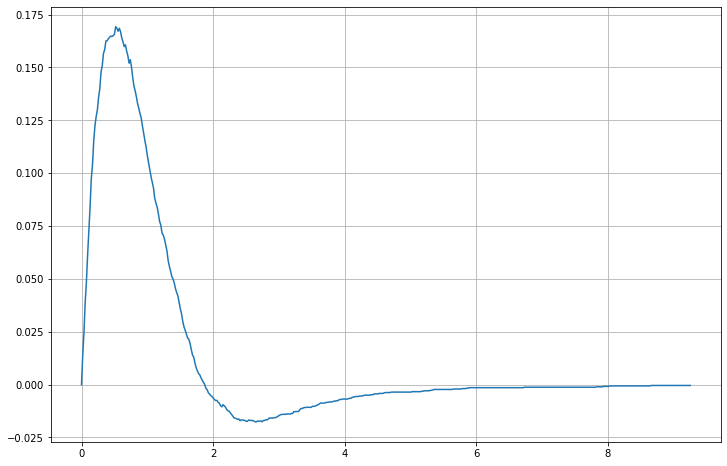

In [203]:
plot(np.sqrt(cdfx),cdfy-norm_equiv)

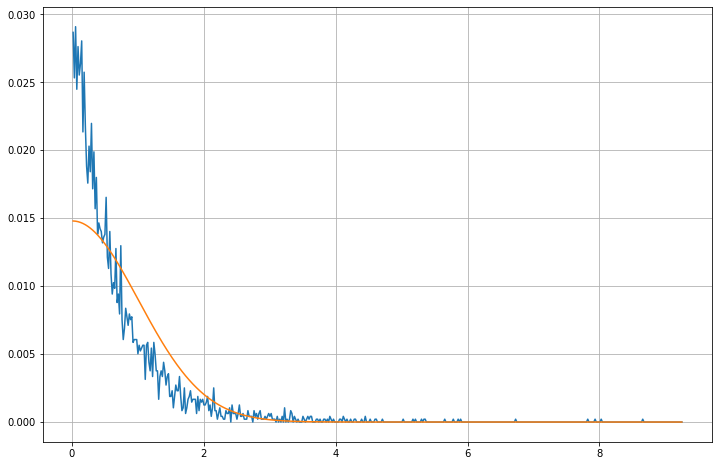

In [204]:
plot(np.sqrt(cdfx[1:]),np.diff(cdfy))
plot(np.sqrt(cdfx[1:]),np.diff(norm_equiv))

In [205]:
solver = np.vectorize(lambda i: opt.brentq(lambda scale: cdfy[i] - stat.chi2.cdf(cdfx[i]*(vol/scale)**2,df=1), 
                                           0.00001, 100.0))

In [206]:
solved_vols = solver(range(1,len(cdfx)))

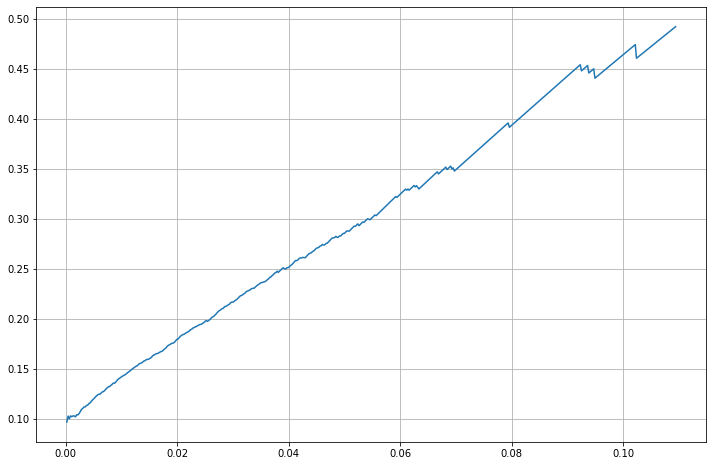

In [207]:
plot(np.sqrt(cdfx[1:])*vol,solved_vols*np.sqrt(252))